# Tukey Method (IQR) for ID and Remove Outliers on Normalized Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset ("diamonds")
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
# Address EMPTY values by either fillna()... or dropna()
df = df.dropna()

In [6]:
df['table']

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

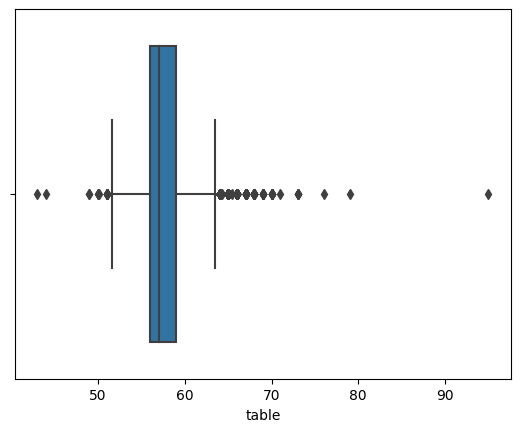

In [7]:
sns.boxplot(x=df['table'])
plt.show()

<ipython-input-8-88a013884a96>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['table'],bins=15,kde=True)


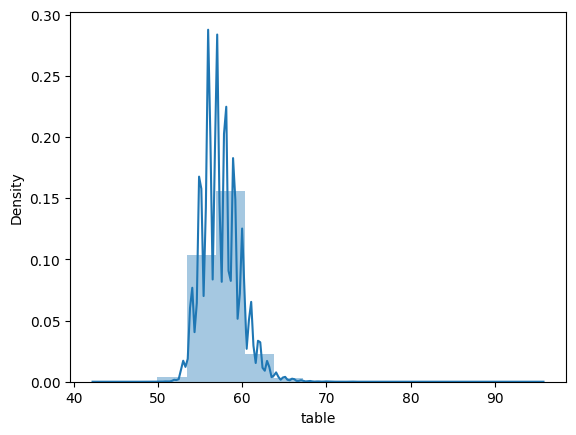

In [8]:
sns.distplot(df['table'],bins=15,kde=True)
plt.show()

In [9]:
df[['table']].describe()

,table
count,53940.000000
mean,57.457184
std,2.234491
min,43.000000
25%,56.000000
50%,57.000000
75%,59.000000
max,95.000000


In [10]:
Q1 = df['table'].quantile(0.25)
Q1

56.0

In [11]:
Q3 = df['table'].quantile(0.75)
Q3

59.0

In [12]:
IQR = Q3 - Q1
IQR

3.0

In [13]:
lower_lim = Q1 - 1.5 * IQR
lower_lim

51.5

In [14]:
upper_lim = Q3 + 1.5 * IQR
upper_lim

63.5

In [17]:
# Dropping Outliers
outlier_15_low = (df['table'] < lower_lim)
outlier_15_up = (df['table'] > upper_lim)
len(outlier_15_up)
len(df['table'])  # number of values total in this feature

53940

In [18]:
n_total = len(df['table'])
n_outliers = len(df['table'][outlier_15_low]) + len(df['table'][outlier_15_up])
n_valid = n_total - n_outliers
n_valid

53335

In [19]:
n_outliers

605

In [20]:
df['table'][(outlier_15_low | outlier_15_up)]  # example records that are outliers

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [21]:
df['table'][~(outlier_15_low | outlier_15_up)]  # all of the records that are NOT outliers

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

In [22]:
# This is where we actually remove outliers:
df = df[~(outlier_15_low | outlier_15_up)]

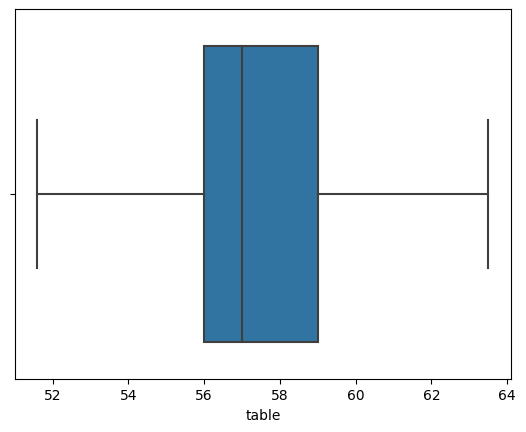

In [23]:
sns.boxplot(x = df['table'])
plt.show()

<ipython-input-24-c0062d9a395a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['table'],bins=10,kde=False)


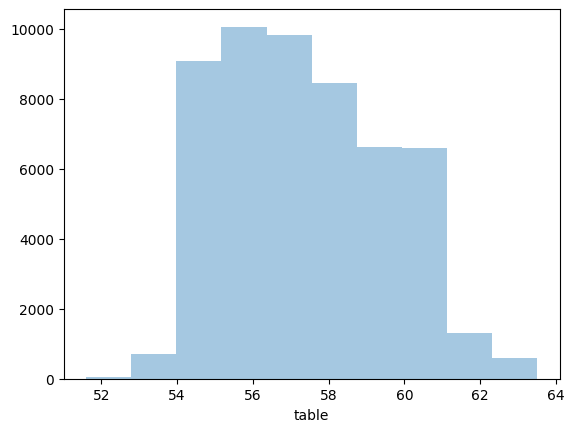

In [24]:
sns.distplot(df['table'],bins=10,kde=False)
plt.show()

# Winsorize

In [25]:
# We do NOT drop any data points... but we cap or limit extreme values with a replaced value of 5 or 95 percentile

In [27]:
df = sns.load_dataset ("diamonds")

<ipython-input-28-c0062d9a395a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['table'],bins=10,kde=False)


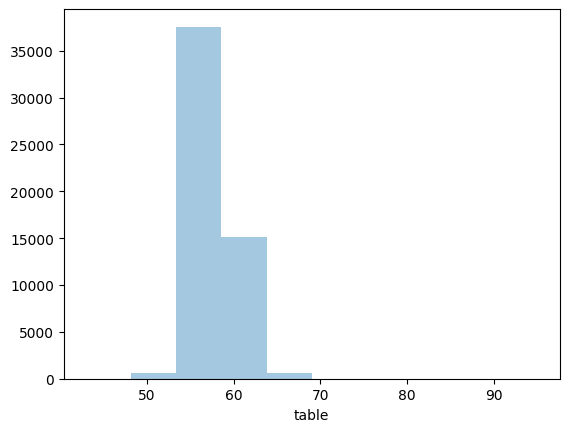

In [28]:
sns.distplot(df['table'],bins=10,kde=False)
plt.show()

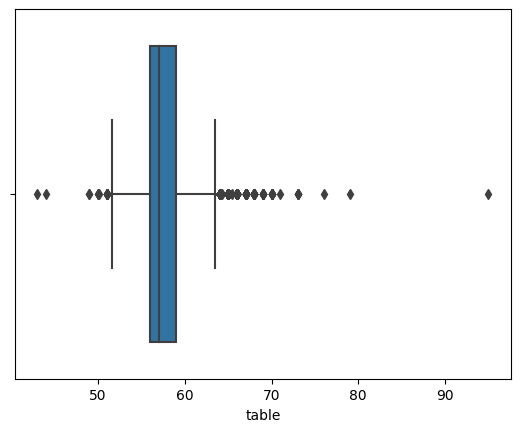

In [29]:
sns.boxplot(x = df['table'])
plt.show()

In [30]:
from scipy.stats.mstats import winsorize
upper_lim

63.5

In [31]:
lower_lim

51.5

In [32]:
df['table'].quantile(0.01)

53.0

In [33]:
df['table'].quantile(0.98)

63.0

In [ ]:
# for the winsorize method - we write the boundaries as a tuple on the percentage ... i.e.: (0.01, 0.02) - that means
# the limits are 1 quantile and 98th quantile

In [34]:
# how do we treat outliers with the winsorization method
df_table_win = winsorize(df['table'],(0.01,0.02))  # lower boundary 1% - upper boundary 1-0.02 or 98th percentile or higher

In [35]:
df_table_win

masked_array(data=[55., 61., 63., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

<Axes: >

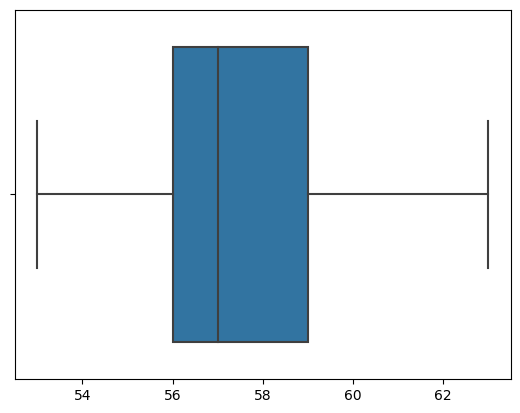

In [36]:
sns.boxplot(x=df_table_win)

In [37]:
df_table_win = pd.DataFrame(df_table_win)[0]
df_table_win.describe()

count    53940.000000
mean        57.434607
std          2.142774
min         53.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.000000
Name: 0, dtype: float64

<ipython-input-38-99b6ab09a792>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_table_win,bins=10,kde=True)


<Axes: xlabel='0', ylabel='Density'>

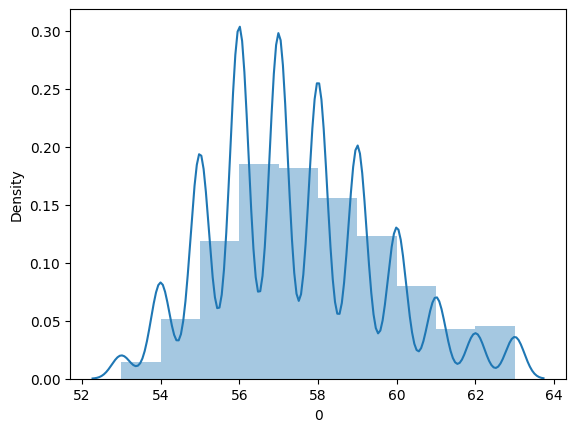

In [38]:
sns.distplot(df_table_win,bins=10,kde=True)

# Log Transformation

In [39]:
# Use when the feature is skewed or non-normalized

In [40]:
df = sns.load_dataset ("diamonds")

<Axes: xlabel='carat'>

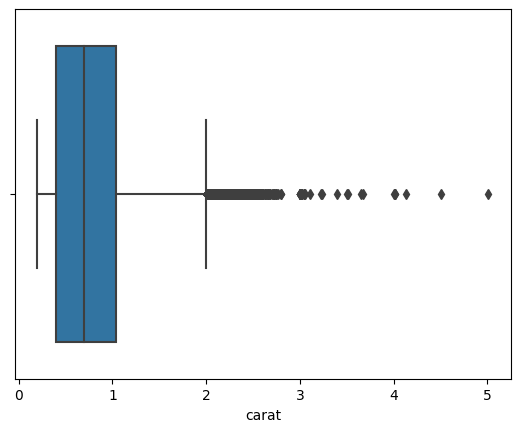

In [42]:
sns.boxplot(x=df['carat'])

<ipython-input-43-570e86a7125a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carat'],bins=10,kde=False)


<Axes: xlabel='carat'>

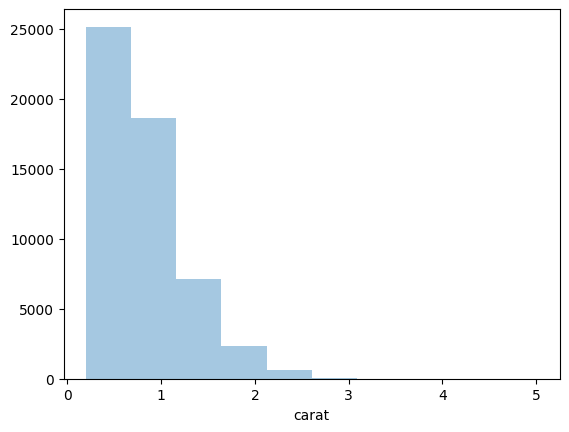

In [43]:
sns.distplot(df['carat'],bins=10,kde=False)

In [44]:
import numpy as np
df_carat_log = np.log(df['carat'])

In [45]:
df['carat'].head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

In [46]:
df_carat_log.head()

0   -1.469676
1   -1.560648
2   -1.469676
3   -1.237874
4   -1.171183
Name: carat, dtype: float64

<Axes: xlabel='carat'>

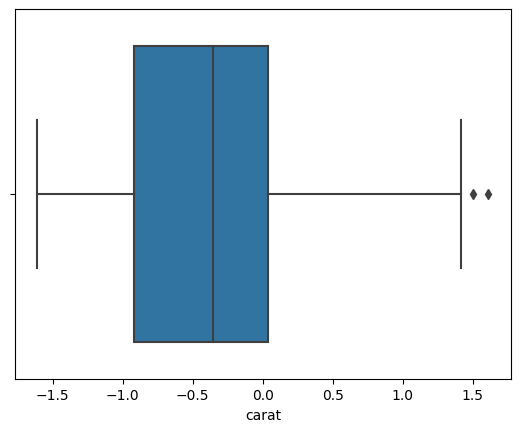

In [47]:
sns.boxplot(x=df_carat_log)

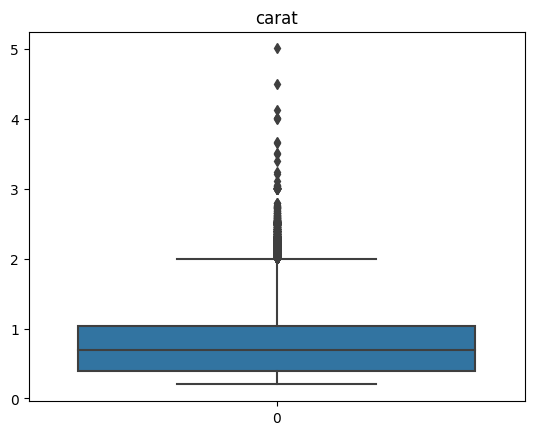

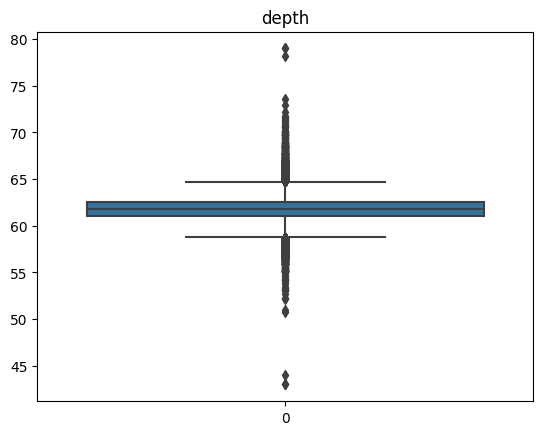

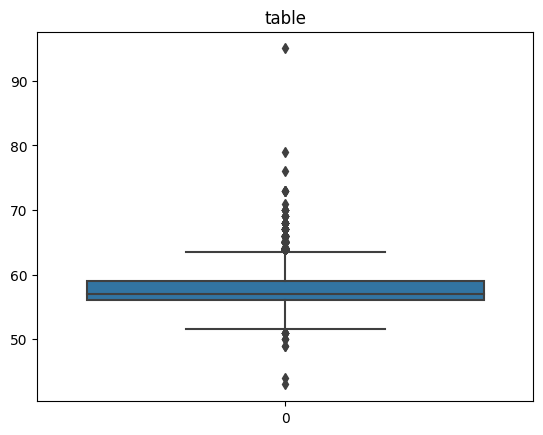

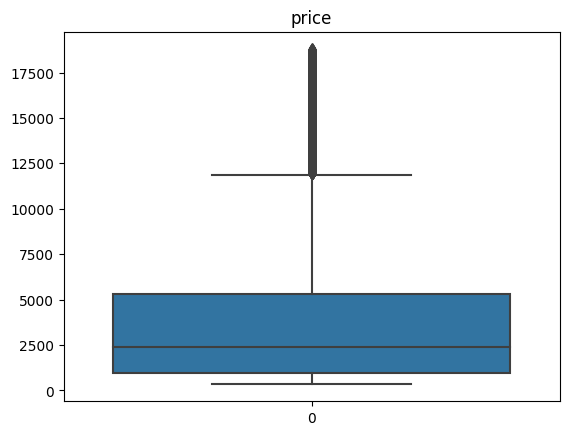

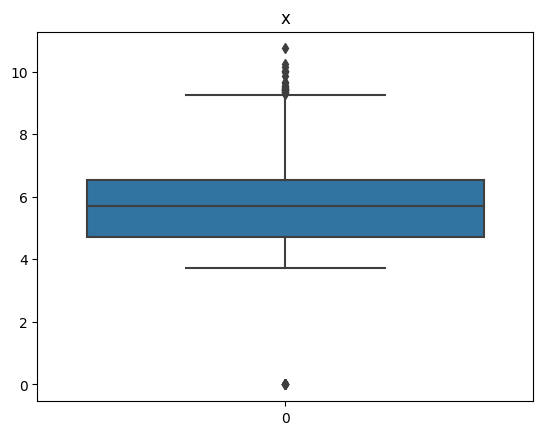

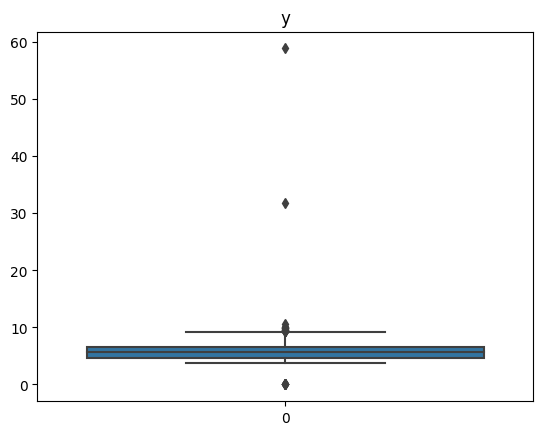

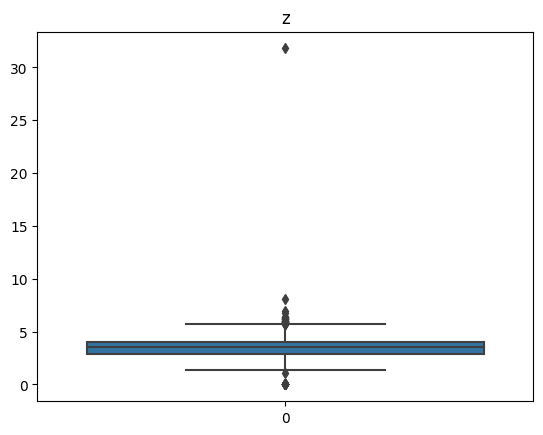

In [48]:
# iterate over the columns in the DataFrame and plot a boxplot for each column
numeric_cols = df.select_dtypes(include=['number']).columns

# create a new DataFrame with only numeric columns
df_numeric = df[numeric_cols]

for col in df_numeric.columns:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

# Bonus:  Profiling Tool

In [49]:
!pip install ydata-profiling
!pip install markupsafe==2.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=9e11c681120d28329692298e436558a591e577eb728fd5730cf3d14fa2e6e203
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2
  Attempting unins

In [50]:
import pandas as pd
from pandas_profiling import ProfileReport

<ipython-input-50-98f09099f855>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv", na_values = -999)

In [52]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
report = ProfileReport(df)
report